## Inside of CNN layers

In [1]:
### so in our previous program where we finally managed to come to the point
### where, we were able to see what is inside of the CNN layers, 
### in this file, I am writing a more generalised code to get the many images and to see
### as many filters

### loading the libraries

In [2]:
import pandas as pandas
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import os
import tensorflow
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.preprocessing.image import load_img, img_to_array, array_to_img

### ------------loading the images---------------

In [3]:
target_size = (224, 224)
base_dir = '../data/raw/test/dogs'
test_images = []

In [4]:
for images_path in os.listdir(base_dir) : 

    actual_image_path = os.path.join(base_dir, images_path)

    try : 
        load_images = load_img(actual_image_path, target_size = target_size)
        load_images = img_to_array(load_images) / 255.0

        test_images.append(load_images)
    except Exception as e : 
        print(f"error loading the image : {images_path} : {e}")

In [5]:
type(test_images)

list

In [6]:
test_images = np.array(test_images)

In [7]:
print(f"{test_images.shape}, type : {type(test_images)}")

(70, 224, 224, 3), type : <class 'numpy.ndarray'>


### --------------loading the prebuilt model----------------

In [8]:
model = load_model('../models/binary_class_model.h5')
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [9]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 24, 24, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 18432)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     2,359,424 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,730,369 (10.42 MB)

 Trainable params: 2,730,369 (10.42 MB)

 Non-trainable params: 0 (0.00 B)

In [10]:
dummy_data = np.zeros((2, 224, 224, 3))
_ = model.predict(dummy_data)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 307ms/step


### -------------writing general functions--------------------

In [58]:
### here, I know that the max. num of filters in a lyer I have are 128,
### whereas in first 2 layers(i.e, conv2d and maxpooling layer) I have 64
### so I am just writing the function for assuming 64 filters max
### in that way I could get the best of both worlds

In [23]:
def feature_maps(model, layer_name, test_images, rank_of_image) : 
    inference_model = Model(inputs = model.inputs, outputs = model.get_layer(layer_name).output)
    feature_map = inference_model.predict(test_images)
    print(f"{feature_map.shape}")
    plt.figure(figsize = (10, 10))
    for i in range(min(121, 64)) : 
        plt.subplot(8, 8, i + 1)
        plt.imshow(feature_map[rank_of_image, :, : , i], cmap = 'viridis')
        plt.axis('off')
    plt.show()

### -------------making the inference model----------------

In [40]:
### from here, now I am just trying and see if everthing works well or not
### then later on I will move towards finiding the
### ways to combine the inputs and automatically finiding the number of filters
### the next step will also contains the methods to update the number of filters or the
### activation functions and make the new model

In [12]:
for i, layers in enumerate(model.layers) : 
    print(f"{i}, {layers}, {layers.name}")

0, <Conv2D name=conv2d, built=True>, conv2d
1, <MaxPooling2D name=max_pooling2d, built=True>, max_pooling2d
2, <Conv2D name=conv2d_1, built=True>, conv2d_1
3, <MaxPooling2D name=max_pooling2d_1, built=True>, max_pooling2d_1
4, <Conv2D name=conv2d_2, built=True>, conv2d_2
5, <MaxPooling2D name=max_pooling2d_2, built=True>, max_pooling2d_2
6, <Conv2D name=conv2d_3, built=True>, conv2d_3
7, <MaxPooling2D name=max_pooling2d_3, built=True>, max_pooling2d_3
8, <Flatten name=flatten, built=True>, flatten
9, <Dense name=dense, built=True>, dense
10, <Dense name=dense_1, built=True>, dense_1


### ---------------checking out the feature maps-------------------

#### let's say for the first conv2d layer

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
(70, 222, 222, 64)


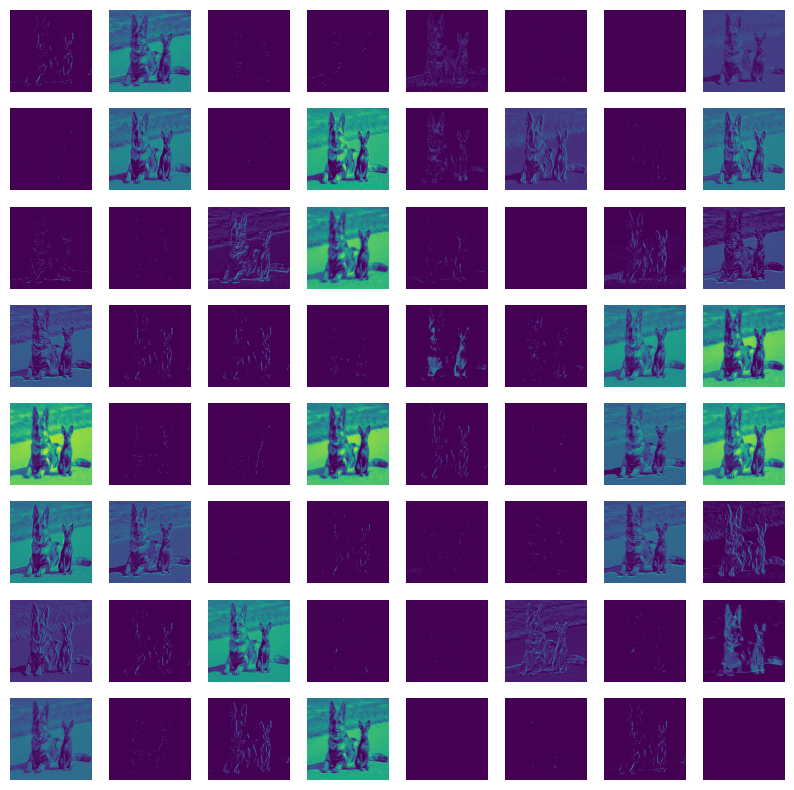

In [24]:
feature_maps(model = model, layer_name = 'conv2d', test_images = test_images, rank_of_image = 41)

1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/stepWARNING:tensorflow:5 out of the last 7 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x000001D9906A47C0> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


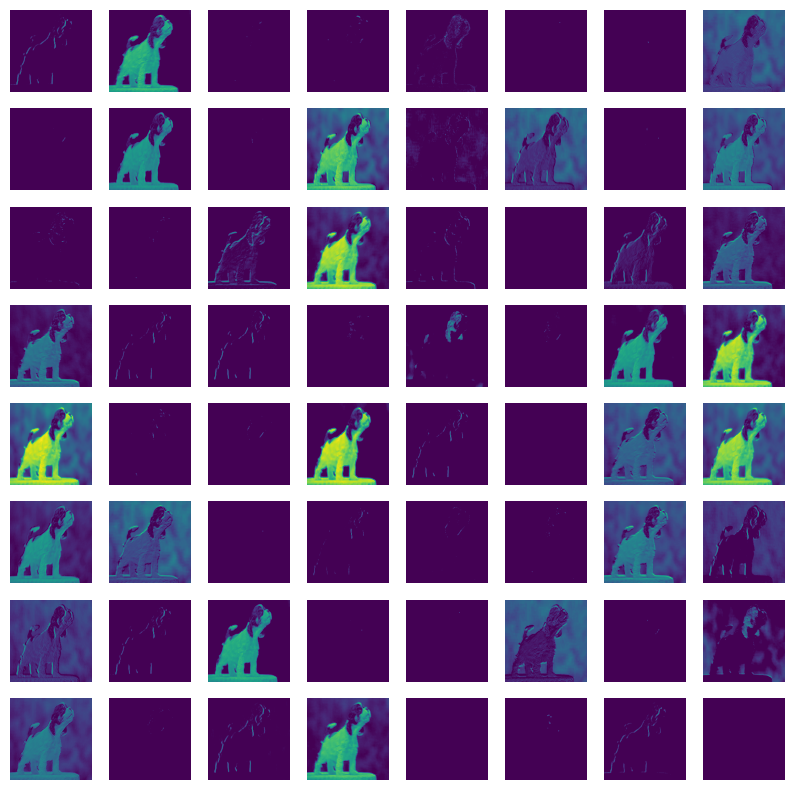

In [14]:
feature_maps(model = model, layer_name = 'conv2d', test_images = test_images, rank_of_image = 5)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


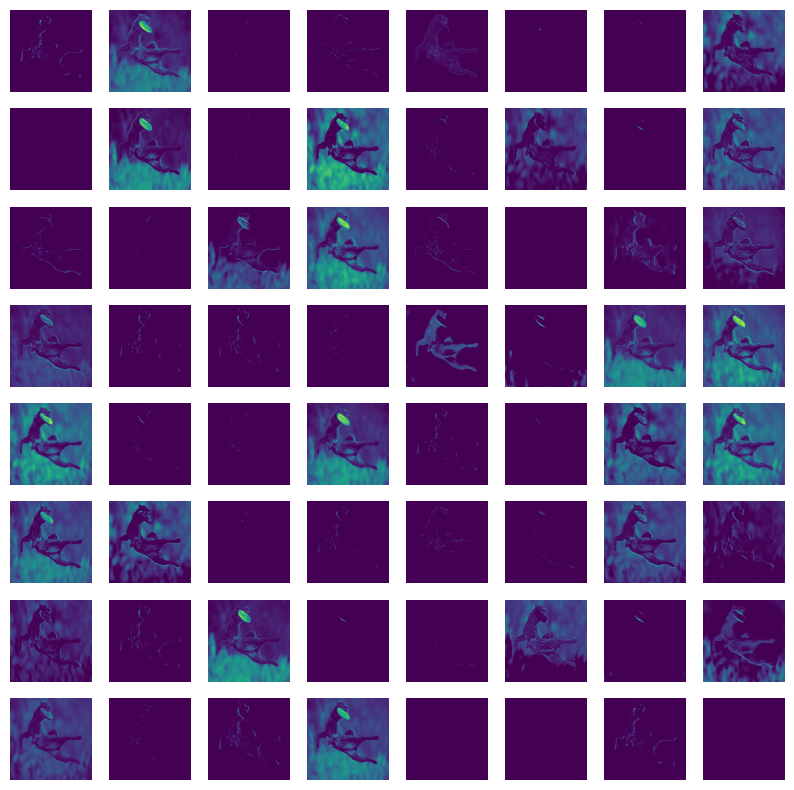

In [15]:
feature_maps(model = model, layer_name = 'conv2d', test_images = test_images, rank_of_image = 65)

### for the final conv2d layer

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 176ms/step
(70, 24, 24, 128)


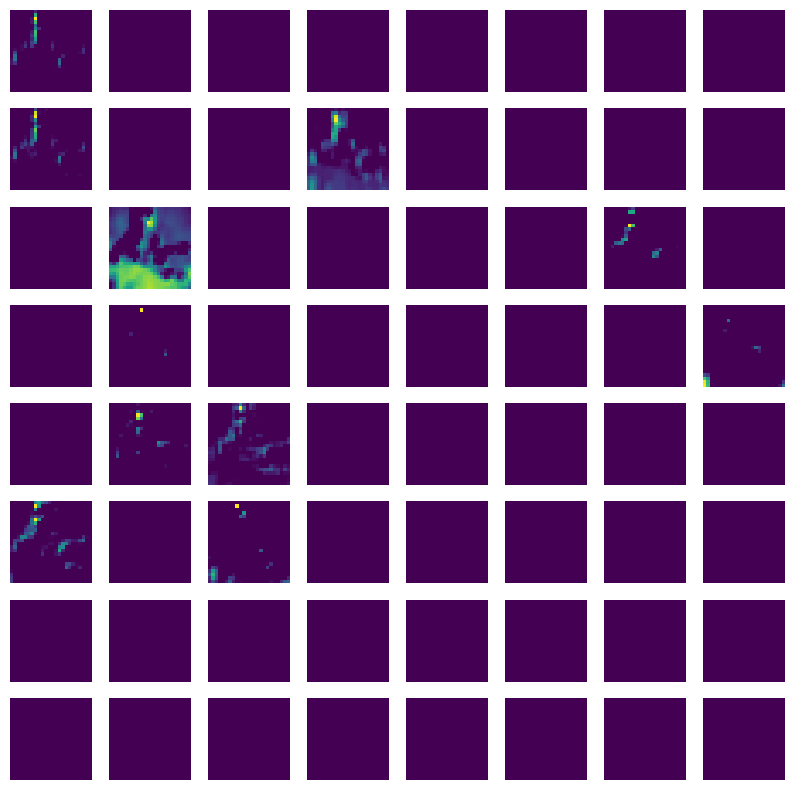

In [58]:
feature_maps(model = model, layer_name = 'conv2d_3', test_images = test_images, rank_of_image = 65)

### let's say for the dense layer
#### for the first image

In [44]:
### so, basically for the dense layers(the second last dense layer)
### these graphs basically shows us how many distintive neurons are being activated and which 
### activation function is being used over there alongside that different features are captured by different neurons
### for the dense layer the shape of output data is different because
### this layer converts the 3d spatial data of the image into a 1d vector

In [49]:
def plot_for_dense(model, layer, rank_of_image) : 
    inference_for_dense = Model(inputs = model.inputs, outputs = model.get_layer(layer).output)
    activation = inference_for_dense.predict(test_images)
    plt.figure(figsize = (8, 4))
    plt.subplot(1, 2, 1)
    plt.plot(activation[rank_of_image])
    plt.title('Dense layers activations for one image')
    plt.subplot(1, 2, 2)
    plt.hist(activation[rank_of_image], bins = 30)
    plt.title('Activation distribution for one sample')
    plt.show()

In [16]:
for i, layers in enumerate(model.layers) : 
    print(f"{i} : {layers} : {layers.name}")

0 : <Conv2D name=conv2d, built=True> : conv2d
1 : <MaxPooling2D name=max_pooling2d, built=True> : max_pooling2d
2 : <Conv2D name=conv2d_1, built=True> : conv2d_1
3 : <MaxPooling2D name=max_pooling2d_1, built=True> : max_pooling2d_1
4 : <Conv2D name=conv2d_2, built=True> : conv2d_2
5 : <MaxPooling2D name=max_pooling2d_2, built=True> : max_pooling2d_2
6 : <Conv2D name=conv2d_3, built=True> : conv2d_3
7 : <MaxPooling2D name=max_pooling2d_3, built=True> : max_pooling2d_3
8 : <Flatten name=flatten, built=True> : flatten
9 : <Dense name=dense, built=True> : dense
10 : <Dense name=dense_1, built=True> : dense_1


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 185ms/step


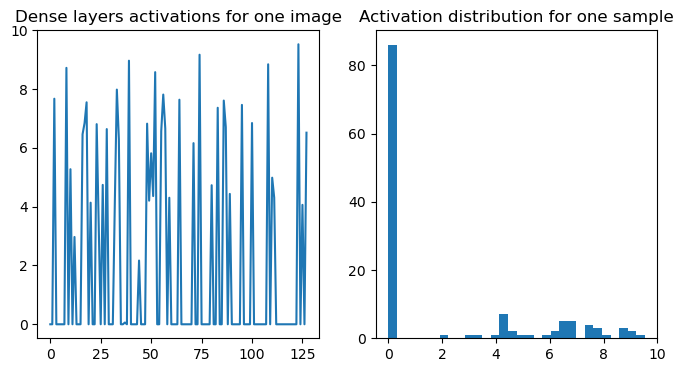

In [50]:
plot_for_dense(model, layer = 'dense', rank_of_image = 1)

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 175ms/step


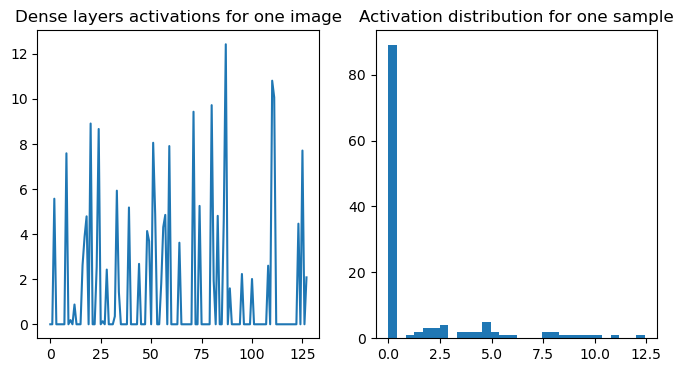

In [51]:
plot_for_dense(model, layer = 'dense', rank_of_image = 5)

### for the second dense layer and same image

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 188ms/step


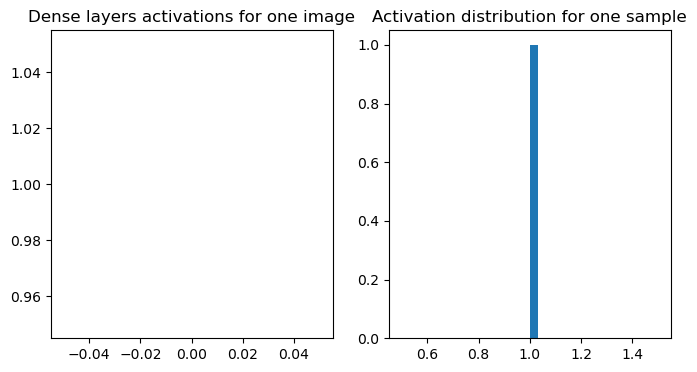

In [52]:
plot_for_dense(model, layer = 'dense_1', rank_of_image = 1)

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 180ms/step


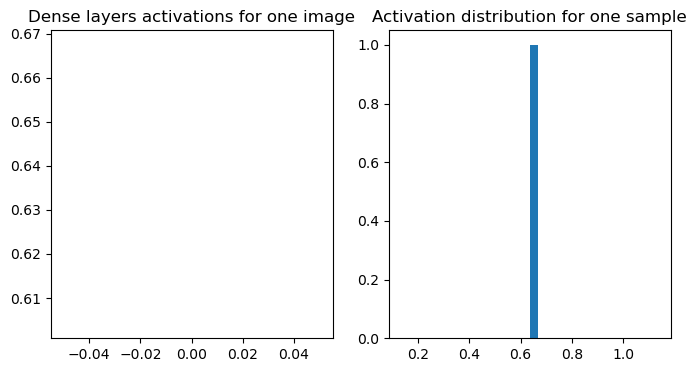

In [53]:
plot_for_dense(model, layer = 'dense_1', rank_of_image = 5)

### ---------------for the flatten layer-------------------

In [54]:
inference_for_flatten = Model(inputs = model.inputs, outputs = model.get_layer('flatten').output)
data = inference_for_flatten.predict(test_images)

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 178ms/step


In [56]:
data.shape

(70, 18432)

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 181ms/step


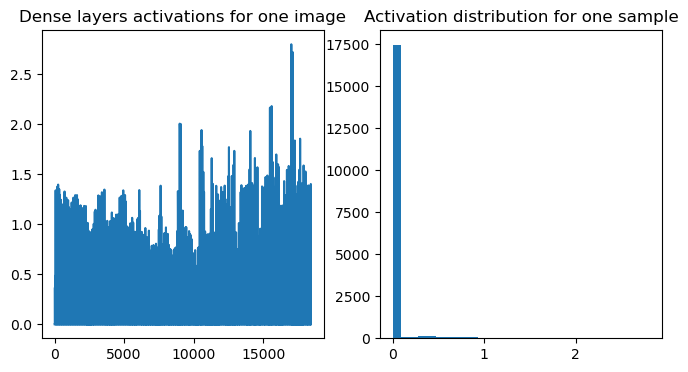

In [57]:
plot_for_dense(model, layer = 'flatten', rank_of_image = 0)